In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("gauravkumar2525/kepler-exoplanet-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/melidia/.cache/kagglehub/datasets/gauravkumar2525/kepler-exoplanet-dataset/versions/1


In [4]:
# Load the dataset
df = pd.read_csv(path + "/exoplanets_data.csv")
print("Loaded dataset shape:", df.shape)
df.describe()

Loaded dataset shape: (9564, 12)


,kepid,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
count,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.00000,9564.000000,9564.000000,9564.000000
mean,7.690628e+06,0.780845,0.480829,75.671358,102.891778,1085.385828,7.745737e+03,5706.82328,1.728712,4.310157,14.264606
std,2.653459e+06,0.863026,0.437658,1334.744046,3018.662296,839.940895,1.565099e+05,781.58775,6.009769,0.424316,1.385376
min,7.574500e+05,0.000000,0.000000,0.241843,0.080000,25.000000,0.000000e+00,2661.00000,0.109000,0.047000,6.966000
25%,5.556034e+06,0.000000,0.000000,2.733684,1.430000,553.000000,2.216000e+01,5333.00000,0.835750,4.232750,13.440000
50%,7.906892e+06,0.000000,0.480829,9.752831,2.490000,906.000000,1.583200e+02,5745.00000,1.006500,4.432000,14.520000
75%,9.873066e+06,2.000000,0.995000,40.715178,21.712500,1352.500000,1.110257e+03,6099.00000,1.435250,4.539000,15.322000
max,1.293514e+07,2.000000,1.000000,129995.778400,200346.000000,14667.000000,1.094755e+07,15896.00000,229.908000,5.364000,20.003000


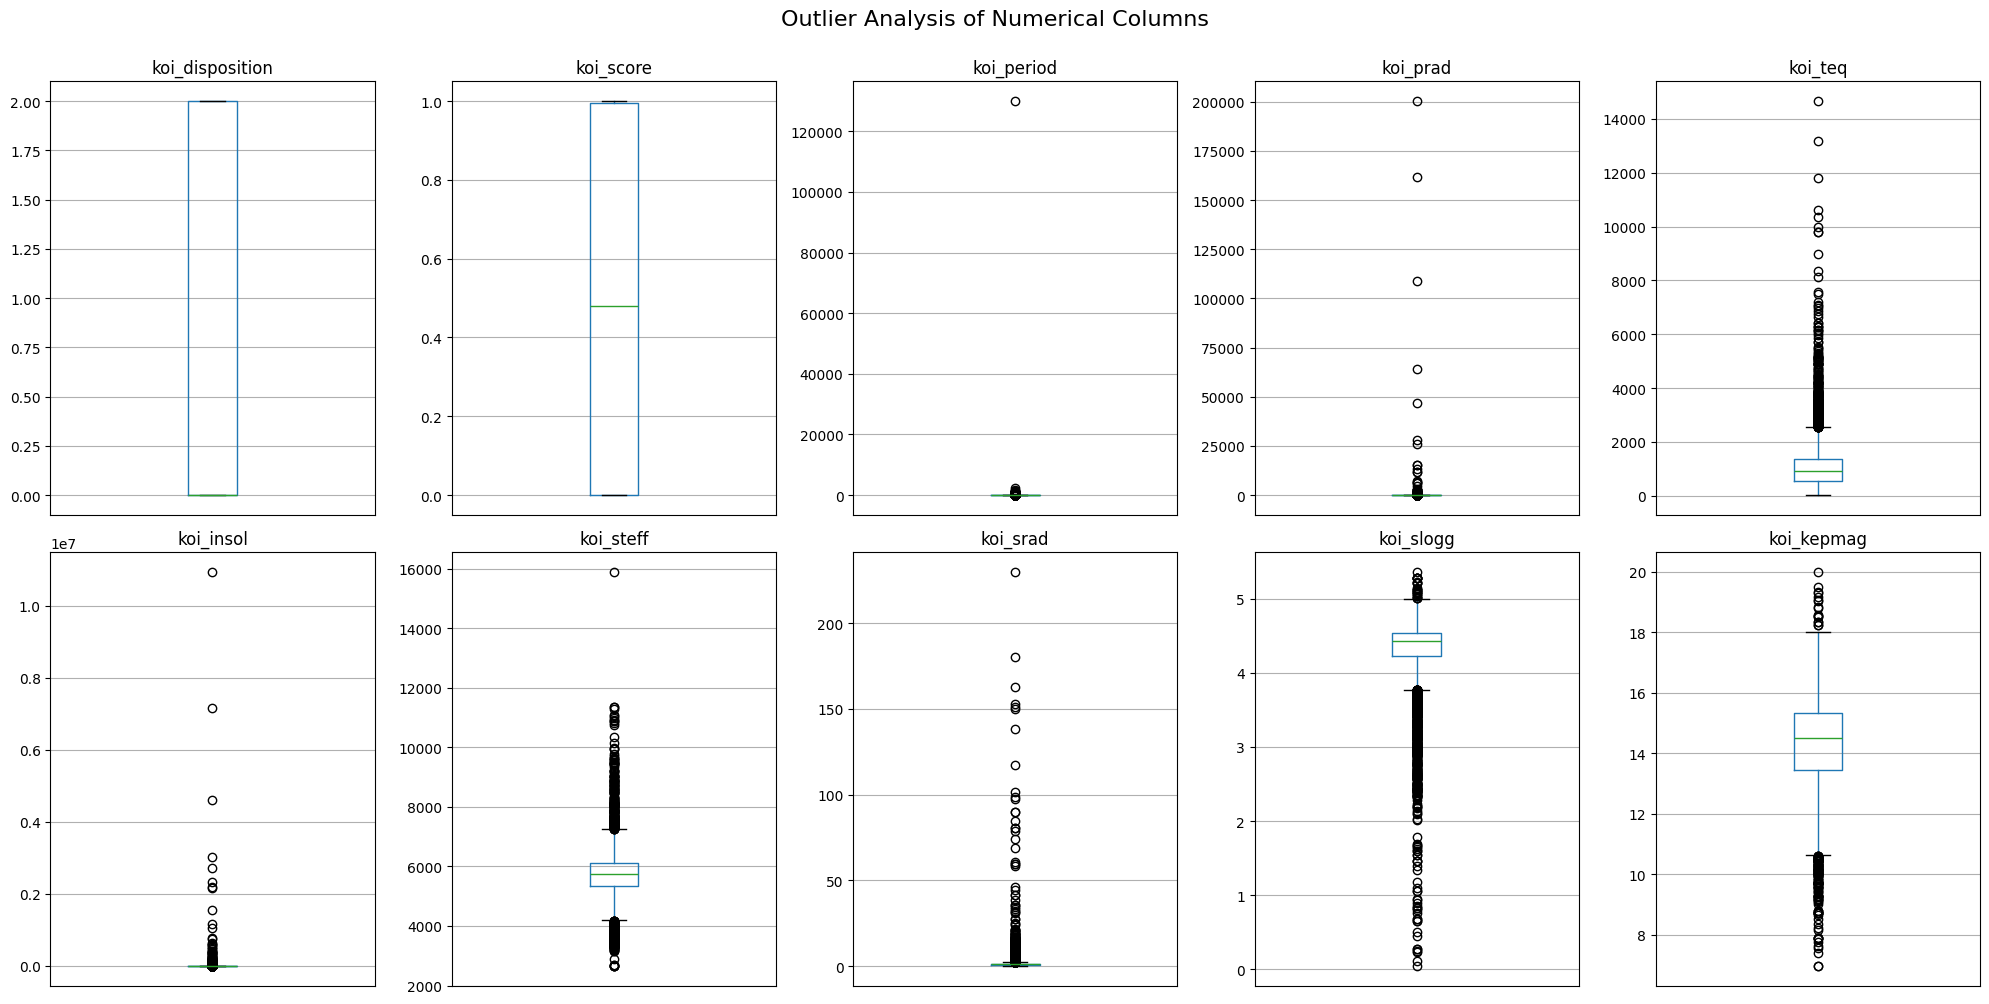

In [5]:
def plot_outliers(df, nrows, ncols, figsize):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle('Outlier Analysis of Numerical Columns', fontsize=16, y=1)

    # Flatten axes for easier indexing
    axes = axes.flatten()

    # Plot boxplots for each numerical column
    for i, col in enumerate(df.columns):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xticks([])

    plt.tight_layout()
    plt.show()

# Plot outliers
plot_outliers(df.select_dtypes(include=['float64', 'int64']).drop('kepid', axis=1), 2, 5, (20, 10))

In [6]:
def detect_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[column] < (Q1 - factor * IQR)) | (df[column] > (Q3 + factor * IQR))
    return is_outlier

# Detect and mark outliers for each numerical column
for col in df.select_dtypes(include=['float64', 'int64']).drop(['kepid', 'koi_disposition', 'koi_score'], axis=1).columns:
    df[col + '_outlier'] = detect_outliers_iqr(df, col)
    print(f"Outliers detected in {col}: {df[col + '_outlier'].sum()} out of {df.shape[0]} rows")

Outliers detected in koi_period: 1567 out of 9564 rows
Outliers detected in koi_prad: 1304 out of 9564 rows
Outliers detected in koi_teq: 450 out of 9564 rows
Outliers detected in koi_insol: 1555 out of 9564 rows
Outliers detected in koi_steff: 595 out of 9564 rows
Outliers detected in koi_srad: 833 out of 9564 rows
Outliers detected in koi_slogg: 734 out of 9564 rows
Outliers detected in koi_kepmag: 156 out of 9564 rows


In [7]:
# Remove the outliers from the main dataset
outlier_columns = [col for col in df.columns if col.endswith('_outlier')]

df_clean_no_transform = df[~df[outlier_columns].any(axis=1)]

print("Cleaned dataset shape without transforms:", df_clean_no_transform.shape)

Cleaned dataset shape without transforms: (5449, 20)


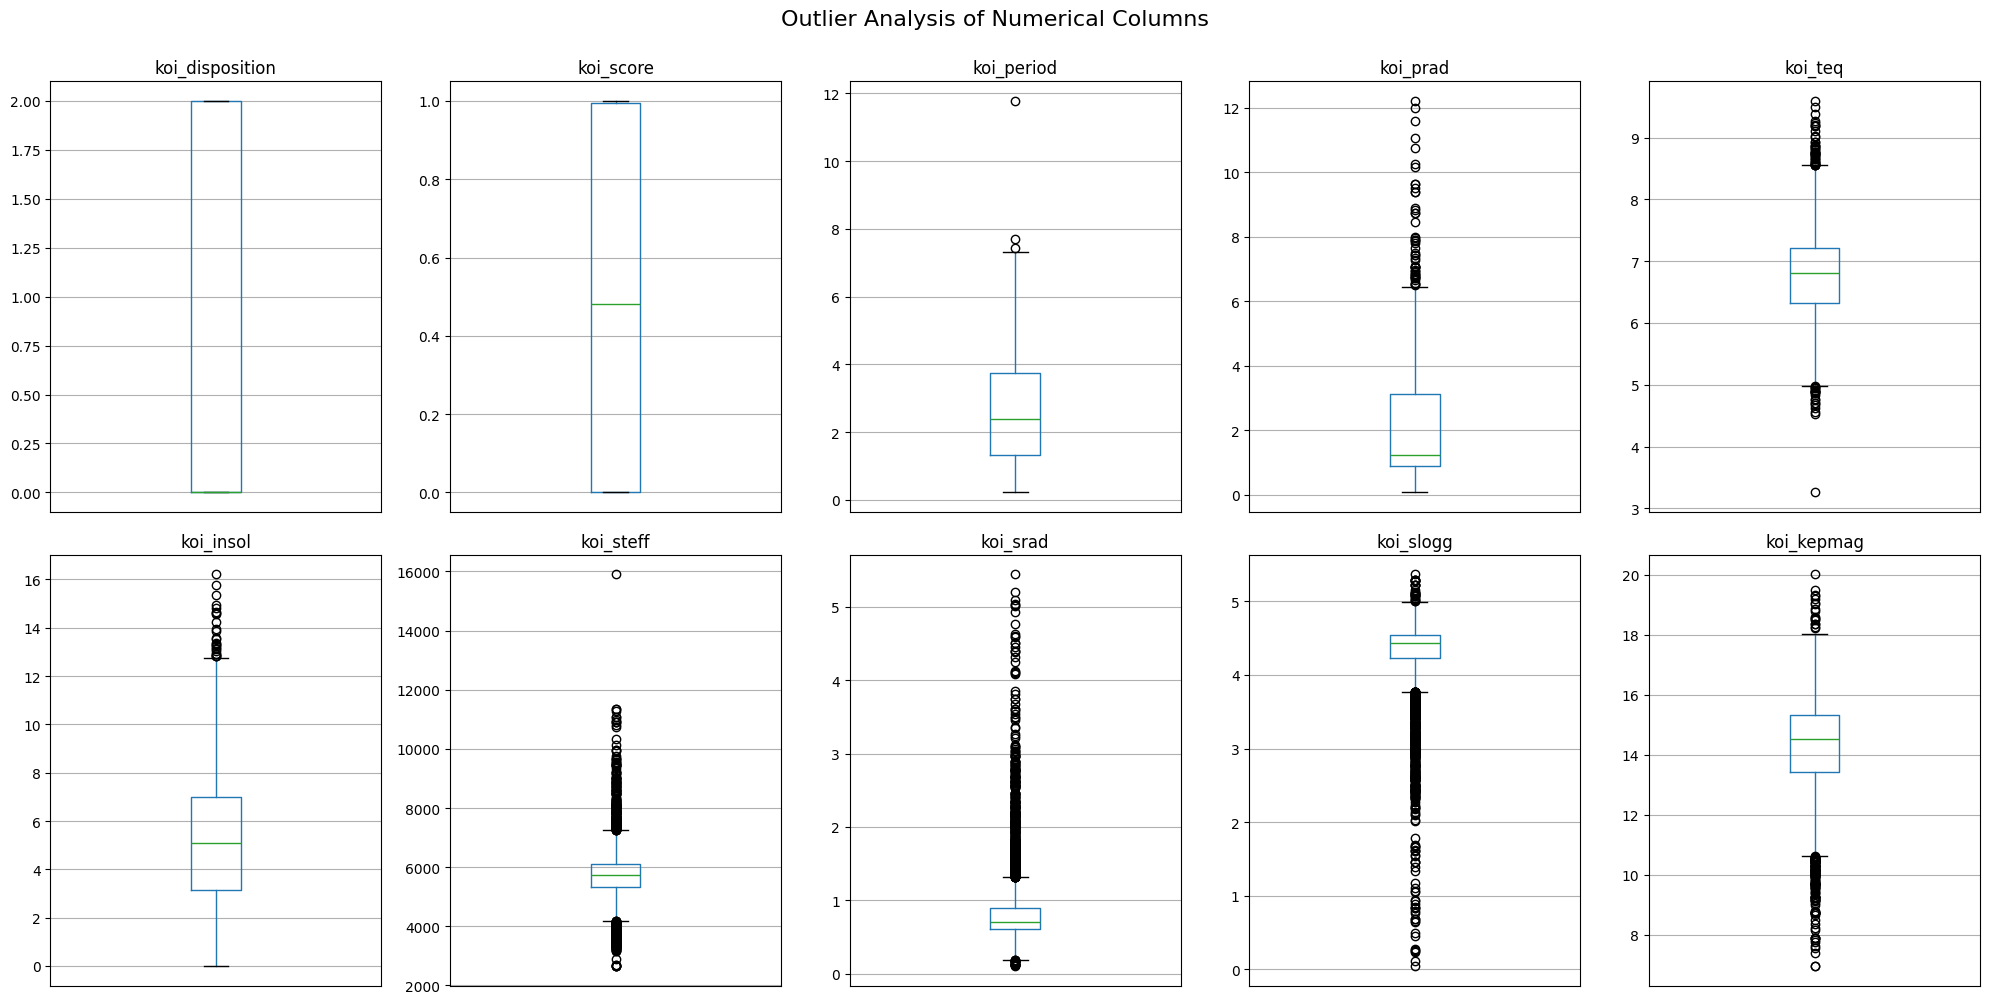

In [8]:
# Apply log1p for each numerical column
df_transformed = df.copy()

log1p_cols = ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad']
for col in df[log1p_cols].columns:
    df_transformed[col] = np.log1p(df[col])

plot_outliers(df_transformed.select_dtypes(include=['float64', 'int64']).drop('kepid', axis=1), 2, 5, (20, 10))

In [9]:
# Detect and mark outliers for each numerical column
for col in df_transformed.select_dtypes(include=['float64', 'int64']).drop(['kepid', 'koi_disposition', 'koi_score'], axis=1).columns:
    df_transformed[col + '_outlier'] = detect_outliers_iqr(df_transformed, col)
    print(f"Outliers detected in {col}: {df_transformed[col + '_outlier'].sum()} out of {df_transformed.shape[0]} rows")

Outliers detected in koi_period: 3 out of 9564 rows
Outliers detected in koi_prad: 50 out of 9564 rows
Outliers detected in koi_teq: 64 out of 9564 rows
Outliers detected in koi_insol: 25 out of 9564 rows
Outliers detected in koi_steff: 595 out of 9564 rows
Outliers detected in koi_srad: 664 out of 9564 rows
Outliers detected in koi_slogg: 734 out of 9564 rows
Outliers detected in koi_kepmag: 156 out of 9564 rows


Cleaned dataset shape with np.log1p transform: (8216, 12)


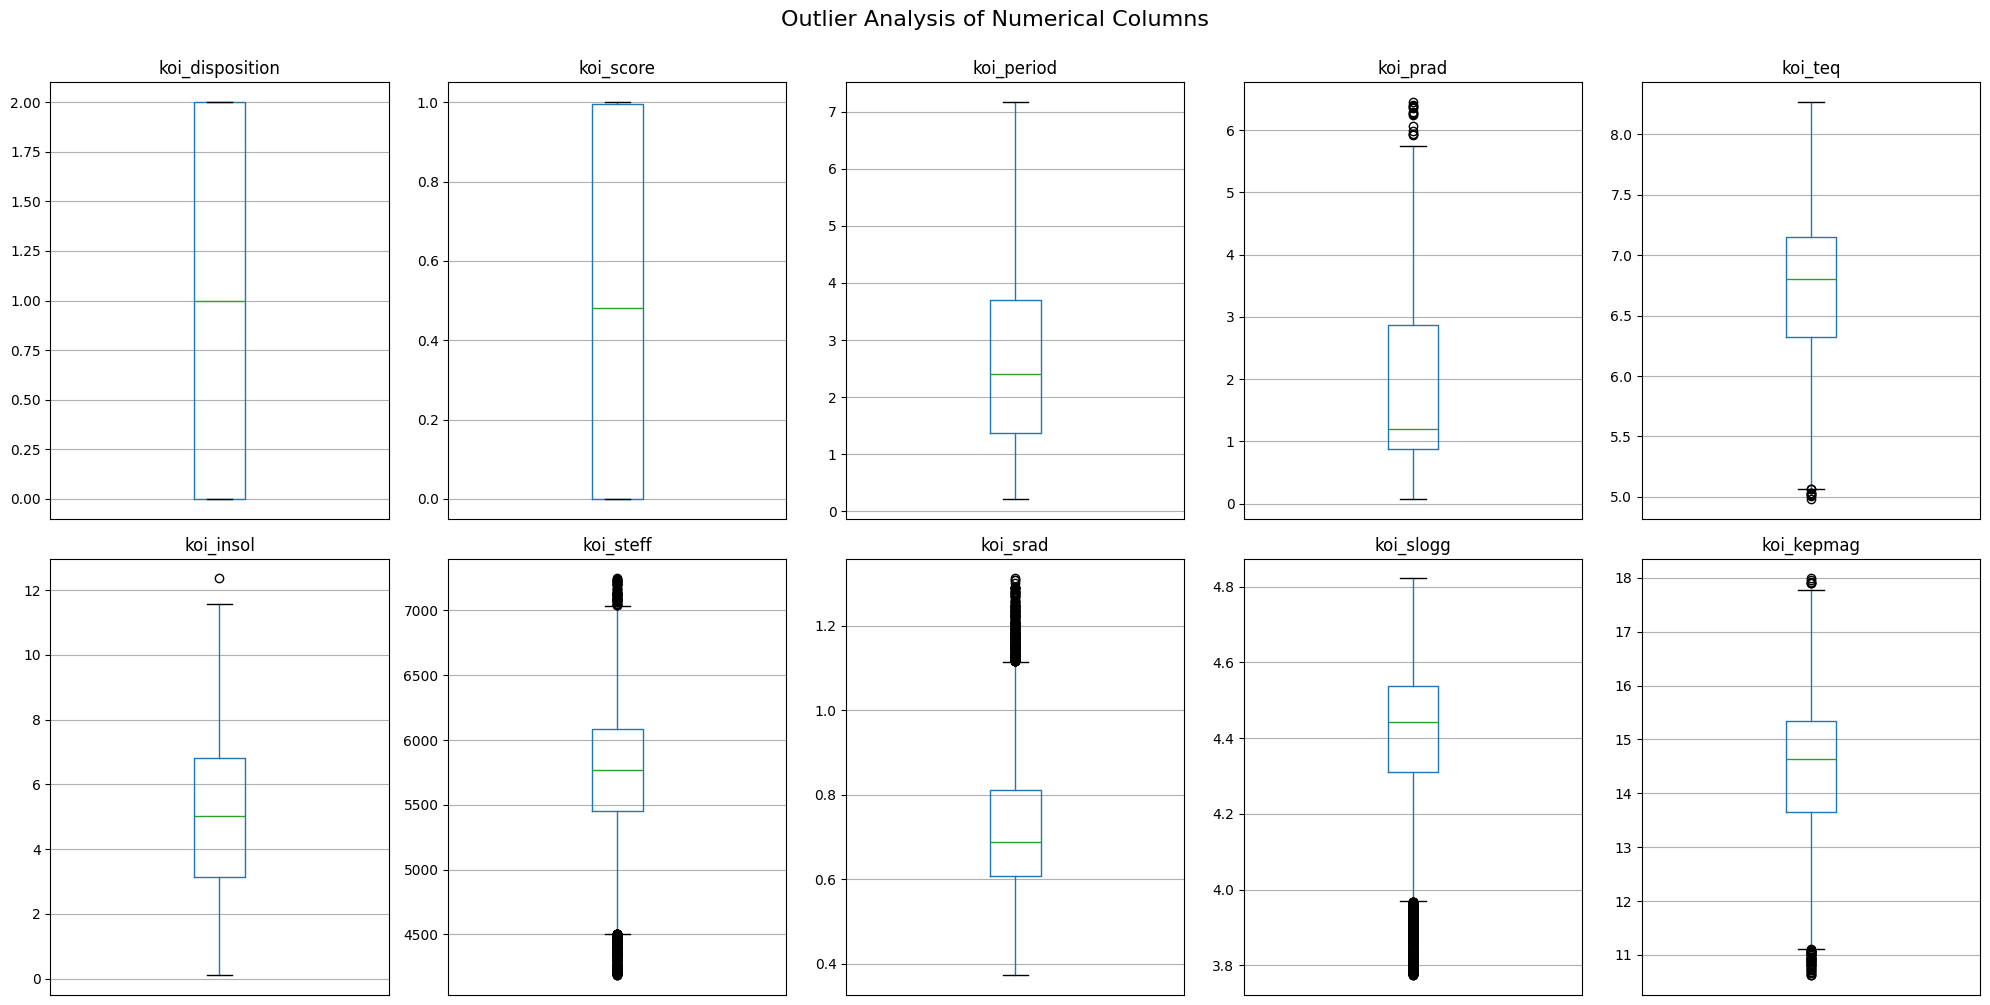

In [10]:
# Remove the outliers from the main dataset
outlier_columns = [col for col in df_transformed.columns if col.endswith('_outlier')]

df_clean_transform = df_transformed[~df_transformed[outlier_columns].any(axis=1)]
df_clean_transform = df_clean_transform.drop(columns=outlier_columns)

print("Cleaned dataset shape with np.log1p transform:", df_clean_transform.shape)

plot_outliers(df_clean_transform.select_dtypes(include=['float64', 'int64']).drop('kepid', axis=1), 2, 5, (20, 10))

In [11]:
df_clean_transform

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,10797460,K00752.01,2,1.000,2.350235,1.181727,6.677083,4.549552,5455.0,0.655964,4.467,15.347
1,10797460,K00752.02,2,0.969,4.014911,1.342865,6.095825,2.313525,5455.0,0.655964,4.467,15.347
2,10811496,K00753.01,1,0.000,3.039708,2.747271,6.459904,3.696351,5853.0,0.624868,4.544,15.436
3,10848459,K00754.01,0,0.000,1.006845,3.539799,7.241366,6.794542,5805.0,0.582774,4.564,15.597
4,10854555,K00755.01,2,1.000,1.260048,1.321756,7.249215,6.832126,6031.0,0.715887,4.438,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...
9558,10031643,K07984.01,0,0.000,2.260707,0.746688,6.835185,5.178407,5638.0,0.736207,4.296,14.478
9559,10090151,K07985.01,0,0.000,0.423762,3.412797,7.644441,8.412173,5638.0,0.643432,4.529,14.082
9560,10128825,K07986.01,1,0.497,1.007903,0.542324,7.383368,7.369481,6119.0,0.708528,4.444,14.757
9561,10147276,K07987.01,0,0.021,0.519628,0.727549,7.704812,8.650746,6173.0,0.713440,4.447,15.385


In [12]:
df_set_1 = df_clean_transform[df_clean_transform['koi_disposition'].isin([0, 2])]
df_set_2 = df_clean_transform[df_clean_transform['koi_disposition'] == 1]

df_set_1_train = df_set_1.sample(frac=0.8, random_state=42)
df_set_1_eval = df_set_1.drop(df_set_1_train.index)

In [13]:
df_set_1_train

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
1563,10978763,K01931.03,2,0.967000,2.077942,0.871293,6.818924,5.111144,5353.0,0.704582,4.358,14.531
5298,5467113,K03825.01,0,0.000000,1.346968,4.919908,7.419381,7.508650,5641.0,1.021011,3.948,15.833
9034,11137061,K07411.01,0,0.670000,1.060953,0.463734,7.130099,6.353396,5413.0,0.561899,4.578,14.606
8821,7366036,K06867.01,0,0.000000,0.449036,0.482426,7.846981,9.225971,6398.0,0.747162,4.358,11.656
119,11913073,K00011.01,0,0.000000,1.557689,2.684440,6.939254,5.590091,5514.0,0.602128,4.569,13.496
...,...,...,...,...,...,...,...,...,...,...,...,...
6637,9455322,K05675.01,0,0.480829,5.203404,1.244155,6.175867,2.608598,7037.0,0.986936,4.136,13.610
4781,5303346,K03275.01,0,0.000000,3.646098,3.444257,6.135565,2.457021,5306.0,0.582216,4.550,14.727
2431,8760040,K02963.01,2,0.999000,2.955983,1.022451,6.668228,4.515574,5951.0,0.816249,4.283,14.544
646,10468940,K01163.02,2,1.000000,2.198891,1.098612,6.763885,4.893802,5359.0,0.694147,4.375,14.968


Accuracy: 0.8709677419354839
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       821
           1       0.81      0.85      0.83       481

    accuracy                           0.87      1302
   macro avg       0.86      0.87      0.86      1302
weighted avg       0.87      0.87      0.87      1302



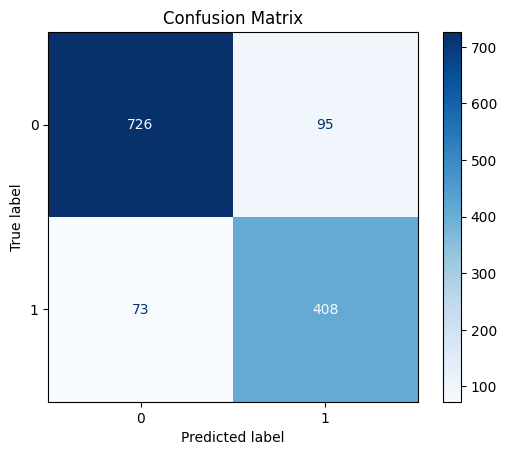

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train = df_set_1_train.drop(columns=['koi_disposition'])
y_train = df_set_1_train['koi_disposition']
X_train = X_train.drop(columns=['kepoi_name', 'koi_slogg', 'koi_score', 'koi_teq'])

X_eval = df_set_1_eval.drop(columns=['koi_disposition'])
y_eval = df_set_1_eval['koi_disposition']
X_eval = X_eval.drop(columns=['kepoi_name', 'koi_slogg', 'koi_score', 'koi_teq'])

y_train = y_train.replace(2, 1)
y_eval = y_eval.replace(2, 1)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_eval)

print("Accuracy:", accuracy_score(y_eval, y_pred))
print("Classification Report:\n", classification_report(y_eval, y_pred))

cm = confusion_matrix(y_eval, y_pred)

# Afișează matricea
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [15]:
X_test = df_set_2.drop(columns=['kepoi_name', 'koi_disposition'])

X_test = X_test[X_train.columns]

y_test_pred = model.predict(X_test)

df_set_2_results = df_set_2.copy()
df_set_2_results['predicted_disposition'] = y_test_pred

In [16]:
df_set_2_results

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag,predicted_disposition
2,10811496,K00753.01,1,0.000,3.039708,2.747271,6.459904,3.696351,5853.0,0.624868,4.544,15.436,0
58,11818800,K00777.01,1,0.999,3.723752,2.141242,6.148468,2.508786,5446.0,0.577175,4.507,15.487,1
62,11918099,K00780.02,1,0.993,2.109081,3.017983,6.599870,4.243196,5005.0,0.568151,4.595,15.334,0
63,9579641,K00115.03,1,0.871,1.489734,0.438255,7.149132,6.427475,5779.0,0.735728,4.339,12.791,0
84,3115833,K00797.01,1,1.000,2.414268,2.166765,6.700731,4.643525,5988.0,0.607589,4.541,15.657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2284957,K08085.01,1,0.416,6.040877,0.993252,5.549076,0.703098,5979.0,0.680568,4.379,14.547,0
9538,9938836,K07978.01,1,0.843,2.112415,0.978326,7.275865,6.936294,6297.0,1.169071,3.890,13.729,0
9542,10011213,K07982.01,1,0.189,5.933252,1.449269,5.583496,0.770108,6231.0,0.670390,4.488,15.632,0
9552,10028127,K08193.01,1,0.519,5.910655,1.551809,5.433722,0.494696,5570.0,0.617885,4.561,15.719,0


Accuracy (SVM): 0.8556067588325653
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       821
           1       0.77      0.86      0.81       481

    accuracy                           0.86      1302
   macro avg       0.84      0.86      0.85      1302
weighted avg       0.86      0.86      0.86      1302



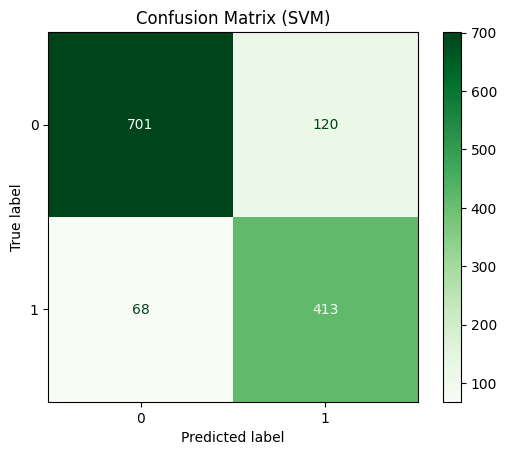

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

svm_model = SVC(kernel='rbf', C=1.0, probability=True)  
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_eval_scaled)

print("Accuracy (SVM):", accuracy_score(y_eval, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_eval, y_pred_svm))
cm_svm = confusion_matrix(y_eval, y_pred_svm)

# Afișează matricea de confuzie
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix (SVM)")
plt.show()

In [18]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = svm_model.predict(X_test_scaled)

df_set_2_results = df_set_2.copy()
df_set_2_results['predicted_disposition'] = y_test_pred

In [19]:
df_set_2_results

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag,predicted_disposition
2,10811496,K00753.01,1,0.000,3.039708,2.747271,6.459904,3.696351,5853.0,0.624868,4.544,15.436,0
58,11818800,K00777.01,1,0.999,3.723752,2.141242,6.148468,2.508786,5446.0,0.577175,4.507,15.487,1
62,11918099,K00780.02,1,0.993,2.109081,3.017983,6.599870,4.243196,5005.0,0.568151,4.595,15.334,0
63,9579641,K00115.03,1,0.871,1.489734,0.438255,7.149132,6.427475,5779.0,0.735728,4.339,12.791,1
84,3115833,K00797.01,1,1.000,2.414268,2.166765,6.700731,4.643525,5988.0,0.607589,4.541,15.657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2284957,K08085.01,1,0.416,6.040877,0.993252,5.549076,0.703098,5979.0,0.680568,4.379,14.547,0
9538,9938836,K07978.01,1,0.843,2.112415,0.978326,7.275865,6.936294,6297.0,1.169071,3.890,13.729,0
9542,10011213,K07982.01,1,0.189,5.933252,1.449269,5.583496,0.770108,6231.0,0.670390,4.488,15.632,0
9552,10028127,K08193.01,1,0.519,5.910655,1.551809,5.433722,0.494696,5570.0,0.617885,4.561,15.719,0


Accuracy (KNN): 0.837173579109063
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       821
           1       0.75      0.83      0.79       481

    accuracy                           0.84      1302
   macro avg       0.82      0.84      0.83      1302
weighted avg       0.84      0.84      0.84      1302



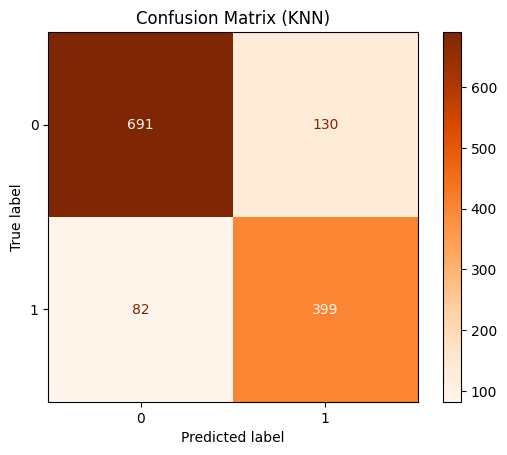

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_eval_scaled)

print("Accuracy (KNN):", accuracy_score(y_eval, y_pred_knn))
print("Classification Report (KNN):\n", classification_report(y_eval, y_pred_knn))
cm_knn = confusion_matrix(y_eval, y_pred_knn)

# Afișează matricea de confuzie
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (KNN)")
plt.show()

In [21]:
y_test_pred_knn = knn_model.predict(X_test_scaled)

df_set_2_results_knn = df_set_2.copy()
df_set_2_results_knn['predicted_disposition'] = y_test_pred_knn


In [22]:
df_set_2_results_knn

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag,predicted_disposition
2,10811496,K00753.01,1,0.000,3.039708,2.747271,6.459904,3.696351,5853.0,0.624868,4.544,15.436,0
58,11818800,K00777.01,1,0.999,3.723752,2.141242,6.148468,2.508786,5446.0,0.577175,4.507,15.487,1
62,11918099,K00780.02,1,0.993,2.109081,3.017983,6.599870,4.243196,5005.0,0.568151,4.595,15.334,0
63,9579641,K00115.03,1,0.871,1.489734,0.438255,7.149132,6.427475,5779.0,0.735728,4.339,12.791,1
84,3115833,K00797.01,1,1.000,2.414268,2.166765,6.700731,4.643525,5988.0,0.607589,4.541,15.657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2284957,K08085.01,1,0.416,6.040877,0.993252,5.549076,0.703098,5979.0,0.680568,4.379,14.547,0
9538,9938836,K07978.01,1,0.843,2.112415,0.978326,7.275865,6.936294,6297.0,1.169071,3.890,13.729,0
9542,10011213,K07982.01,1,0.189,5.933252,1.449269,5.583496,0.770108,6231.0,0.670390,4.488,15.632,0
9552,10028127,K08193.01,1,0.519,5.910655,1.551809,5.433722,0.494696,5570.0,0.617885,4.561,15.719,0
